# Análise da folha de pagamento da Unitins

In [ ]:
import os.path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [5]:
df = pd.DataFrame()

if os.path.isfile('folha.csv'):
    df = pd.read_csv("folha.csv", sep=";")
else:
    for ano in range(2008, 2021):
        for mes in range(1, 13):
            clear_output(wait=True)
            print("Referência: {}_{:02}".format(ano, mes))
            url = "https://www.unitins.br/portaltransparencia/folha-de-pagamento?TipoAno={}&tipoMes={:02}&TipoPesquisa=Nome&busca=".format(ano, mes)
            try:
                salario = pd.read_html(url)
                df_salario = pd.DataFrame(salario[0])
                df_salario['referencia'] = "{}_{:02}".format(ano, mes)

                df = df.append(df_salario, ignore_index=True)
            except:
                pass
    df['TOTAL VENCIMENTO*'] = [x.strip("R$ ") for x in df['TOTAL VENCIMENTO*']]
    df['DESCONTO IRRF'] = [x.strip("R$ ") for x in df['DESCONTO IRRF']]
    df['DESCONTO PREVIDÊNCIA'] = [x.strip("R$ ") for x in df['DESCONTO PREVIDÊNCIA']]
    df['DESCONTOS DIVERSOS'] = [x.strip("R$ ") for x in df['DESCONTOS DIVERSOS']]
    df['SALÁRIO LÍQUIDO'] = [x.strip("R$ ") for x in df['SALÁRIO LÍQUIDO']]

    df['TOTAL VENCIMENTO*'] = df['TOTAL VENCIMENTO*'].str.replace('.', "")
    df['TOTAL VENCIMENTO*'] = df['TOTAL VENCIMENTO*'].str.replace(',', ".").astype(float)

    df['DESCONTO IRRF'] = df['DESCONTO IRRF'].str.replace('.', "")
    df['DESCONTO IRRF'] = df['DESCONTO IRRF'].str.replace(',', ".").astype(float)

    df['DESCONTO PREVIDÊNCIA'] = df['DESCONTO PREVIDÊNCIA'].str.replace('.', "")
    df['DESCONTO PREVIDÊNCIA'] = df['DESCONTO PREVIDÊNCIA'].str.replace(',', ".").astype(float)

    df['DESCONTOS DIVERSOS'] = df['DESCONTOS DIVERSOS'].str.replace('.', "")
    df['DESCONTOS DIVERSOS'] = df['DESCONTOS DIVERSOS'].str.replace(',', ".").astype(float)

    df['SALÁRIO LÍQUIDO'] = df['SALÁRIO LÍQUIDO'].str.replace('.', "")
    df['SALÁRIO LÍQUIDO'] = df['SALÁRIO LÍQUIDO'].str.replace(',', ".").astype(float)
    
    df.to_csv("folha.csv", sep=";", index=False)

Referência: 2021_12


## Número de servidores na Unitins

In [ ]:
# df.head()

print("Total de servidores: ", len(df))
print("Total de efetivos: ", len(df[df['VÍNCULO'] == 'EFETIVO']))
print("Total de comissionados: ", len(df[df['VÍNCULO'] == 'COMISSIONADO']))
print("Total de contratados: ", len(df[df['VÍNCULO'] == 'CONTRATADO']))
print("Total de a disposição: ", len(df[df['VÍNCULO'] == 'EFETIVO/Disp'] ))


In [7]:
profs = ['PROF. ADJUNTO I', 'PROF. DOUTOR I /2893',
       'PROF. MESTRE I /2893', 'PROF.UNIVERSITARIO 2',
       'PROF.UNIVERSITARIO 3', 'PROF.UNIVERSITARIO I', 'QS PU1PROF ESP. 4',
       'QS PU1PROF. DOUTOR4', 'QS PU1PROF. MESTRE4']

filtro_prof_efetivos = (df['FUNÇÃO'].isin(profs)) & (df['VÍNCULO'] == 'EFETIVO')

# df[filtro_prof_efetivos]

In [ ]:
pyplot
matplotlib

## Descrição do campo salário líquido: média, menor, maior e moda.

Menor:  -5.7
Maior:  51886.74
Moda:  0.0


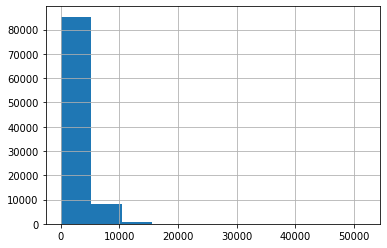

In [8]:
df['SALÁRIO LÍQUIDO'].hist()
print("Menor: ", np.min(df['SALÁRIO LÍQUIDO']))
print("Maior: ", np.max(df['SALÁRIO LÍQUIDO']))
print("Moda: ", df['SALÁRIO LÍQUIDO'].mode()[0])

## Descrição do campo salário bruto: média, menor, maior e moda.

In [ ]:
df['TOTAL VENCIMENTO*'] = df['TOTAL VENCIMENTO*'].str.replace('.', "")
df['TOTAL VENCIMENTO*'] = df['TOTAL VENCIMENTO*'].str.replace(',', ".").astype(float)

Média:  3319.107548585949
Menor:  0.0
Maior:  67004.96
Moda:  1367.19


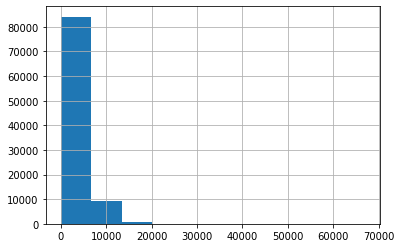

In [10]:
df['TOTAL VENCIMENTO*'].hist()

print("Média: ", np.mean(df['TOTAL VENCIMENTO*']))
print("Menor: ", np.min(df['TOTAL VENCIMENTO*']))
print("Maior: ", np.max(df['TOTAL VENCIMENTO*']))
print("Moda: ", df['TOTAL VENCIMENTO*'].mode()[0])

In [11]:
media_mensal = []
for ano in range(2008, 2022):
    for mes in range(1, 13):
        filtro_referencia = (df['referencia'] == "{}_{:02}".format(ano, mes))
        media = np.mean(df[filtro_referencia]['SALÁRIO LÍQUIDO'])
        if pd.isnull(media) == False:
            media_mensal.append(media)

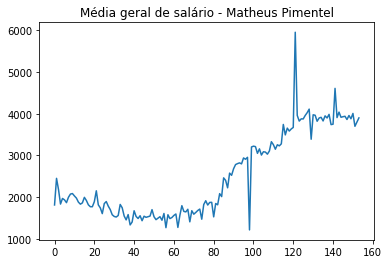

In [12]:
ypoints = np.array(media_mensal)

plt.plot(ypoints)
plt.title("Média geral de salário - Matheus Pimentel")
plt.show()